In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv("NBA_Dataset_csv.csv")

In [2]:
print("Duimension of the Dataset: ",data.shape)

Duimension of the Dataset:  (159, 7)


In [3]:
data.columns

Index(['Team', 'Points_Scored', 'Weightlifting_Sessions_Average',
       'Yoga_Sessions_Average', 'Laps_Run_Per_Practice_Average',
       'Water_Intake', 'Players_Absent_For_Sessions'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Team                            159 non-null    object 
 1   Points_Scored                   159 non-null    int64  
 2   Weightlifting_Sessions_Average  150 non-null    float64
 3   Yoga_Sessions_Average           139 non-null    float64
 4   Laps_Run_Per_Practice_Average   145 non-null    float64
 5   Water_Intake                    145 non-null    float64
 6   Players_Absent_For_Sessions     130 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 8.8+ KB


In [5]:
df=data.rename(columns={'Points_Scored':'Points','Weightlifting_Sessions_Average':'WL','Yoga_Sessions_Average':'Yoga','Laps_Run_Per_Practice_Average':'Laps','Water_Intake':'WI','Players_Absent_For_Sessions':'PAFS'})

In [6]:
df.Points

0      242
1      144
2      156
3      159
4      106
      ... 
154     12
155     13
156     12
157     20
158      0
Name: Points, Length: 159, dtype: int64

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

/home/abhishektiwari/anaconda3/lib/python3.11/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


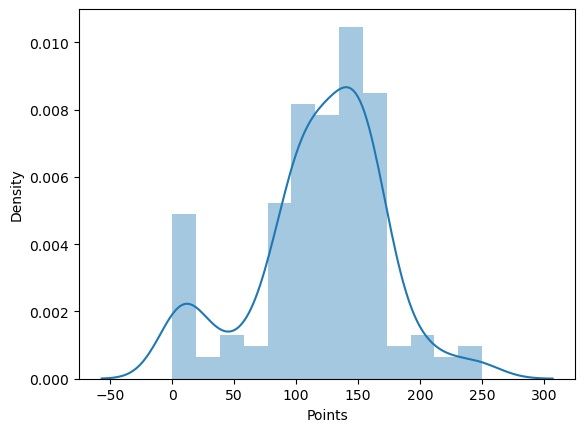

In [8]:
# Distplot

ax=sns.distplot(df.Points)

/home/abhishektiwari/anaconda3/lib/python3.11/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


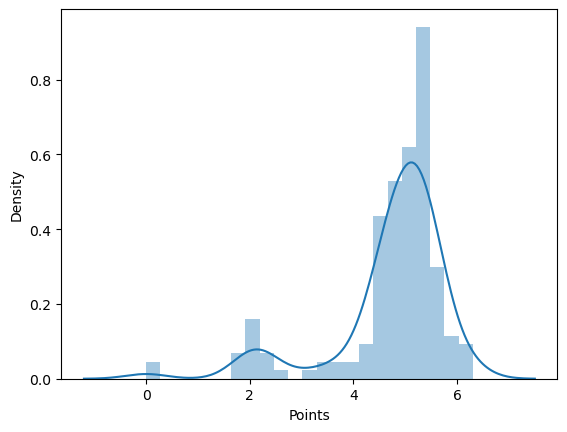

In [9]:
ax=sns.distplot(np.cbrt(df.Points))

/home/abhishektiwari/anaconda3/lib/python3.11/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Axes: xlabel='Points'>

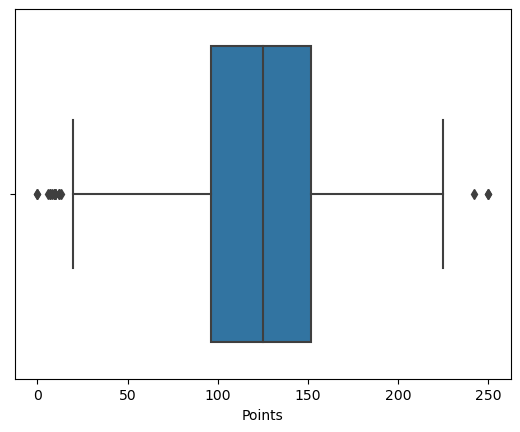

In [10]:
sns.boxplot(df.Points)

In [11]:
df.tail(100)

,Team,Points,WL,Yoga,Laps,WI,PAFS
59,Clippers,156,34.0,28.0,40.0,5.0,5.0
60,Clippers,122,37.0,29.0,44.0,5.0,2.0
61,Warriors,55,14.0,8.0,17.0,3.0,3.0
62,Warriors,60,14.0,8.0,17.0,3.0,4.0
63,Warriors,90,16.0,11.0,20.0,3.0,7.0
...,...,...,...,...,...,...,...
154,Bulls,12,12.0,12.0,13.0,1.0,NaN
155,Bulls,13,12.0,12.0,14.0,1.0,NaN
156,Bulls,12,12.0,13.0,14.0,1.0,NaN
157,Bulls,20,13.0,14.0,15.0,1.0,6.0


In [12]:
def plotting_box_violin_plots(df,x,y):
  fig,axes=plt.subplots(1,2,figsize=(18,10))
  fig.suptitle("Violin and boxplots for variable: {}".format(y))

  sns.violinplot(ax=axes[0],x=x,y=y,data=df)
  sns.boxplot(ax=axes[1],data=df[y])

  axes[0].set_title("Violin plot for variable: {}".format(y))
  axes[1].set_title("Box plot for variable: {}".format(y))



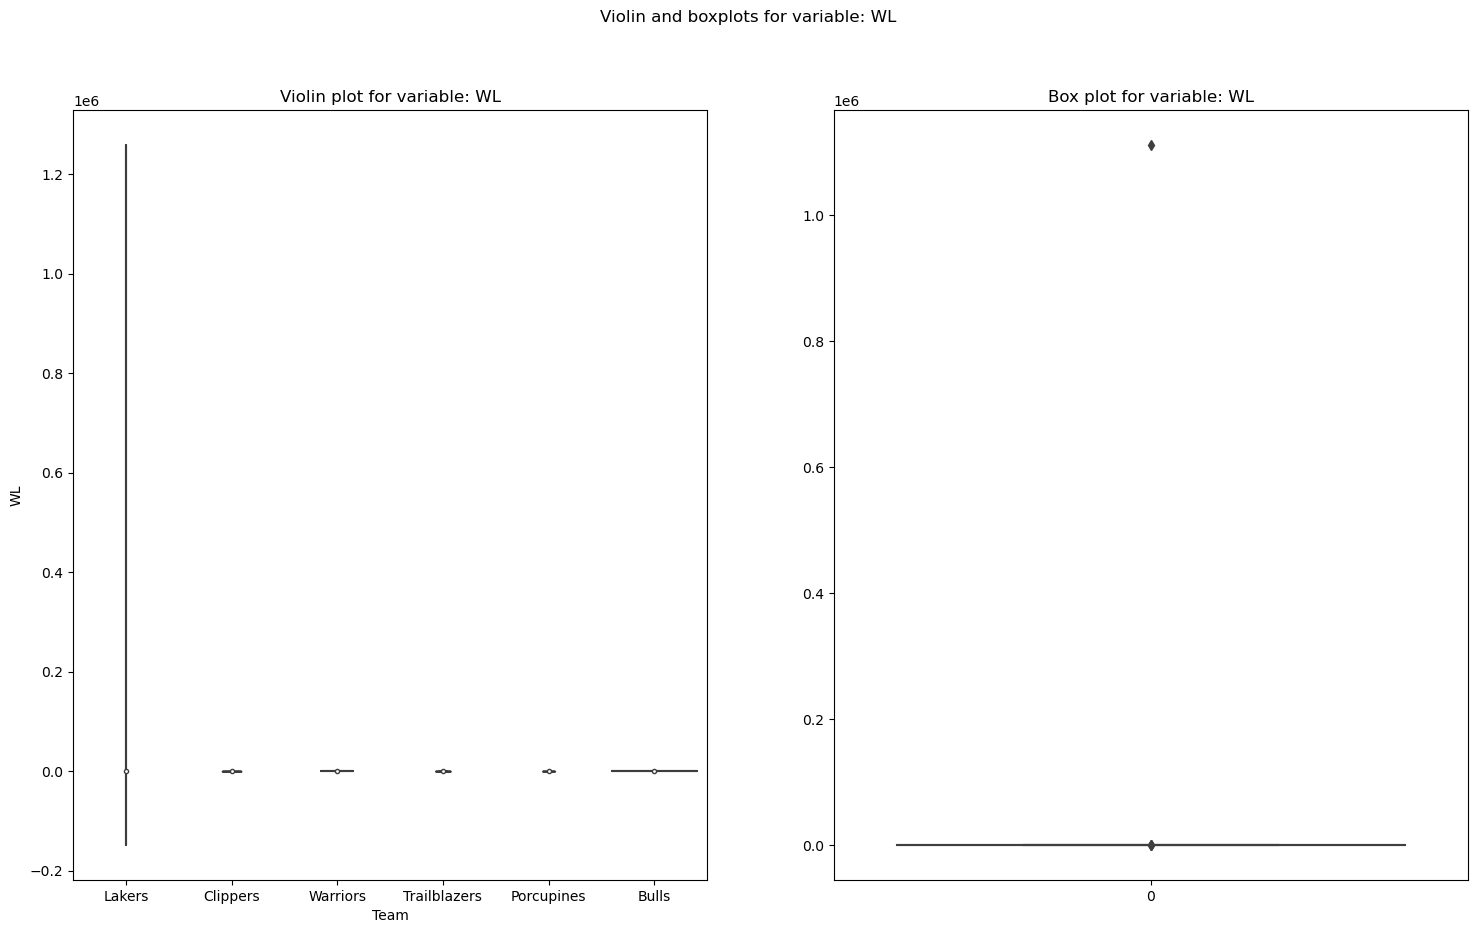

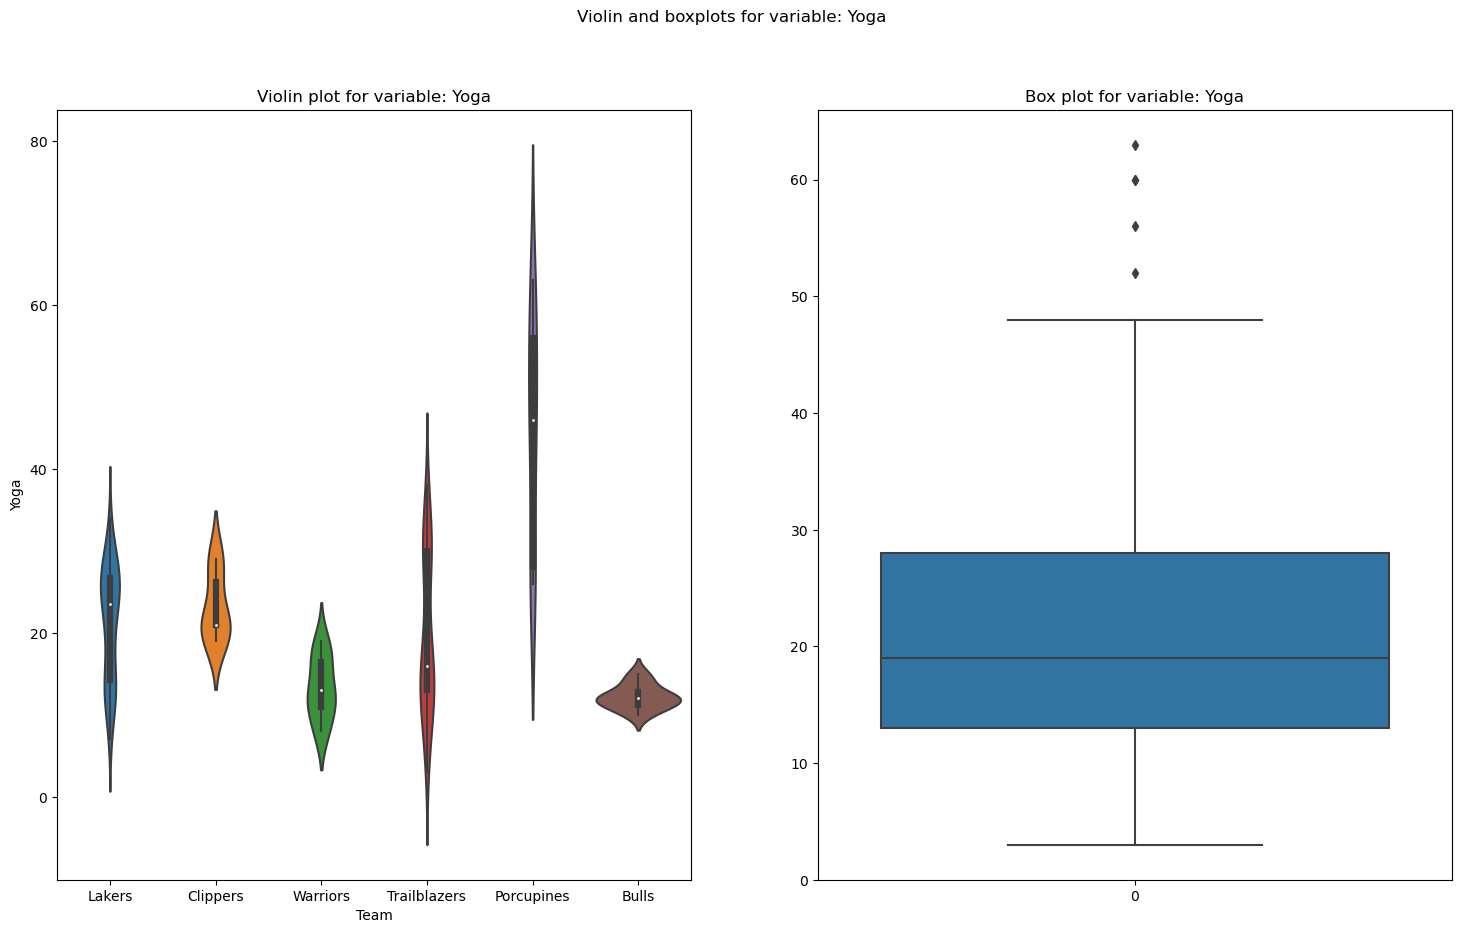

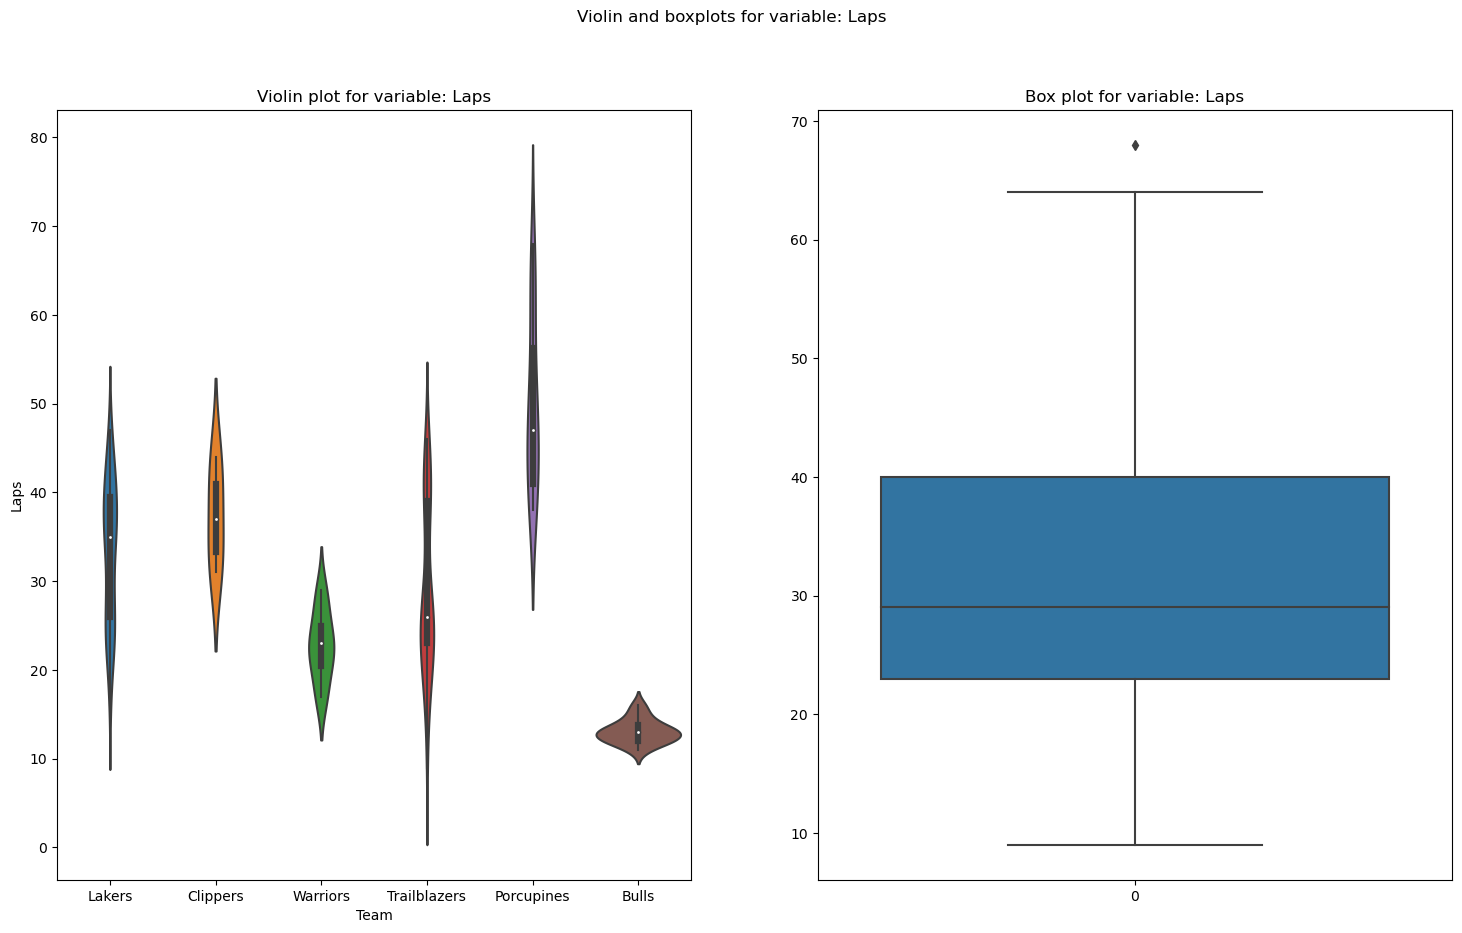

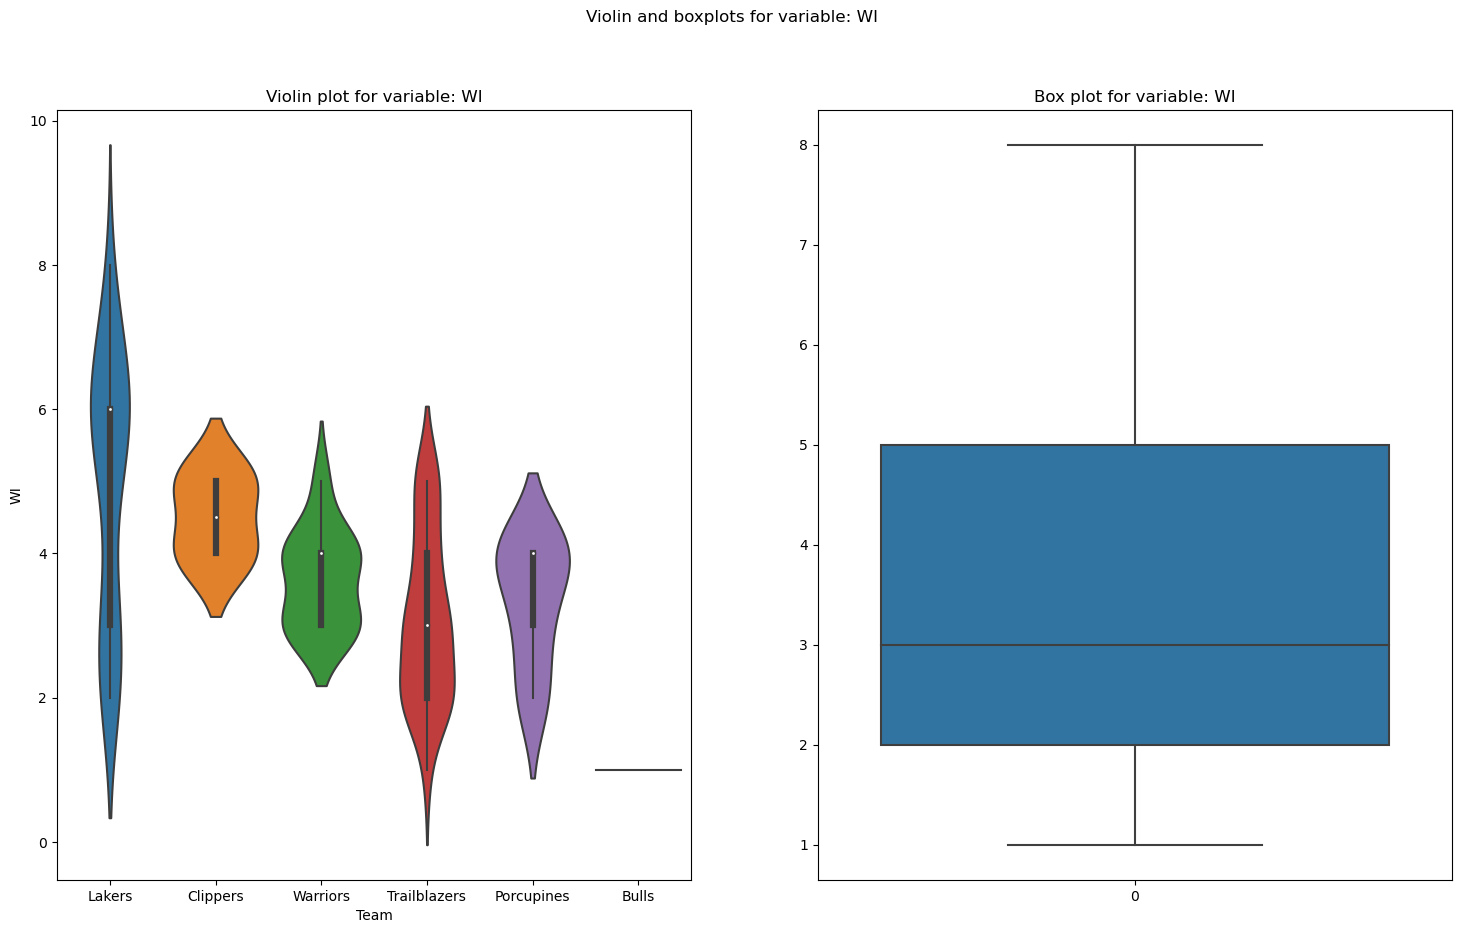

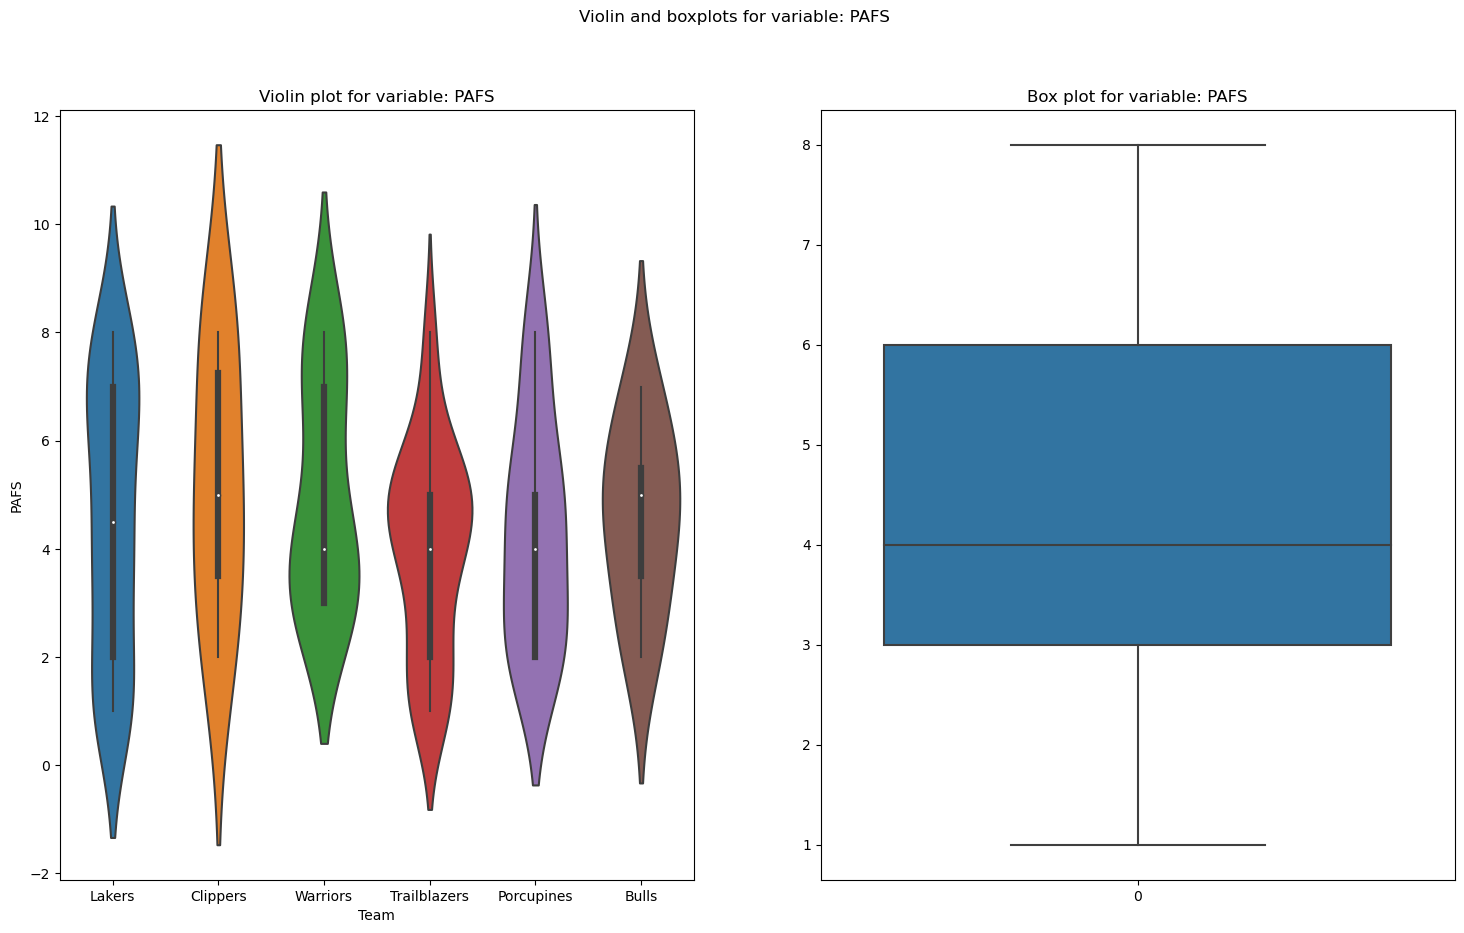

In [13]:
for x in ['WL',	'Yoga',	'Laps',	'WI',	'PAFS']:
  plotting_box_violin_plots(df,"Team",x)

In [14]:
def find_outliers(df,column):
  Q1=df[column].quantile(0.25)
  Q3=df[column].quantile(0.75)
  IQR=Q3-Q1
  Upper_End=Q3+1.5*IQR
  Lower_End=Q1-1.5*IQR

  outlier=df[column][ (df[column]>Upper_End) | (df[column]<Lower_End) ]

  return outlier

In [15]:
for column in ['WL',	'Yoga',	'Laps',	'WI',	'PAFS']:
  print("\n Outlier in column '%s' " %column)

  outlier= find_outliers(df,column)
  print(outlier)


 Outlier in column 'WL' 
8      1111111.0
142         56.0
143         56.0
144         59.0
Name: WL, dtype: float64

 Outlier in column 'Yoga' 
140    52.0
141    56.0
142    60.0
143    60.0
144    63.0
Name: Yoga, dtype: float64

 Outlier in column 'Laps' 
144    68.0
Name: Laps, dtype: float64

 Outlier in column 'WI' 
Series([], Name: WI, dtype: float64)

 Outlier in column 'PAFS' 
Series([], Name: PAFS, dtype: float64)


In [16]:
df_clean=df.drop([142,143,144])

In [17]:
df_clean.shape

(156, 7)

In [18]:
# df_clean['WL'][df_clean['WL']==1111111.0]=np.nan

In [19]:
df_clean['WL']

0      23.0
1      24.0
2      24.0
3      26.0
4      27.0
       ... 
154    12.0
155    12.0
156    12.0
157    13.0
158    14.0
Name: WL, Length: 156, dtype: float64

## Imputation Techniques

In [20]:
ncounts=pd.DataFrame([df_clean.isna().mean()]).T

In [21]:
ncounts=ncounts.rename(columns={1:'data_missing'})

In [22]:
ncounts

,0
Team,0.000000
Points,0.000000
WL,0.057692
Yoga,0.128205
Laps,0.089744
WI,0.089744
PAFS,0.185897


<Axes: title={'center': '% of missing values across each column'}>

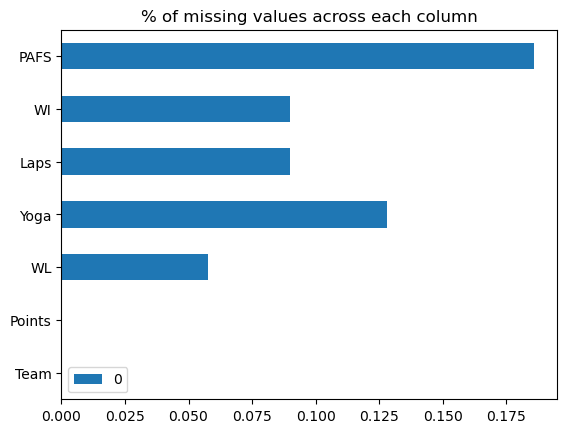

In [23]:
ncounts.plot(kind='barh',title='% of missing values across each column')

In [24]:
df_clean.shape, df_clean.dropna(axis=0).shape

((156, 7), (94, 7))

In [25]:
df_clean.shape, df_clean.dropna(axis=1).shape

((156, 7), (156, 2))

## Pandas Imputer

In [26]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156 entries, 0 to 158
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Team    156 non-null    object 
 1   Points  156 non-null    int64  
 2   WL      147 non-null    float64
 3   Yoga    136 non-null    float64
 4   Laps    142 non-null    float64
 5   WI      142 non-null    float64
 6   PAFS    127 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 9.8+ KB


In [27]:
df_clean['WL'].fillna(-1)

0      23.0
1      24.0
2      24.0
3      26.0
4      27.0
       ... 
154    12.0
155    12.0
156    12.0
157    13.0
158    14.0
Name: WL, Length: 156, dtype: float64

/home/abhishektiwari/anaconda3/lib/python3.11/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Axes: xlabel='WL', ylabel='Density'>

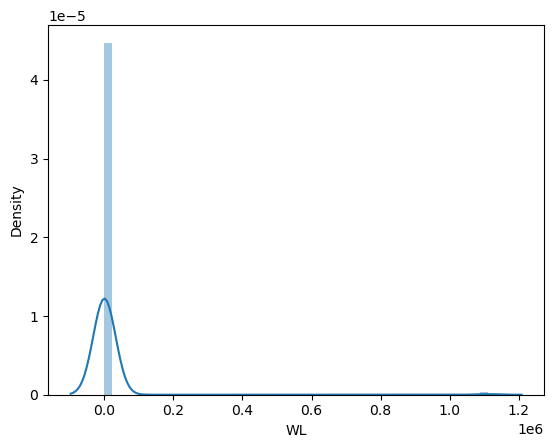

In [28]:
sns.distplot(df_clean['WL'].fillna(df_clean['WL'].mean()))

/home/abhishektiwari/anaconda3/lib/python3.11/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Axes: xlabel='WL', ylabel='Density'>

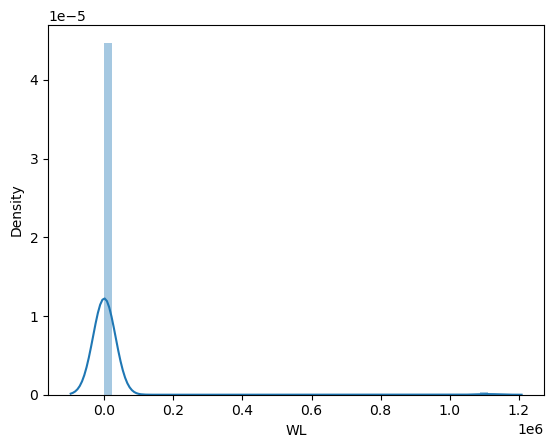

In [29]:
sns.distplot(df_clean['WL'].fillna(df_clean['WL'].median()))

In [30]:
# Groupby Team

mean_WL = df_clean.groupby("Team")['WL'].mean().to_dict()

In [31]:
mean_WL

{'Bulls': 11.214285714285714,
 'Clippers': 29.0,
 'Lakers': 23173.645833333332,
 'Porcupines': 39.42857142857143,
 'Trailblazers': 25.425925925925927,
 'Warriors': 18.727272727272727}

In [32]:
WL_series = df_clean['WL'].replace(mean_WL)

/home/abhishektiwari/anaconda3/lib/python3.11/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Axes: xlabel='WL', ylabel='Density'>

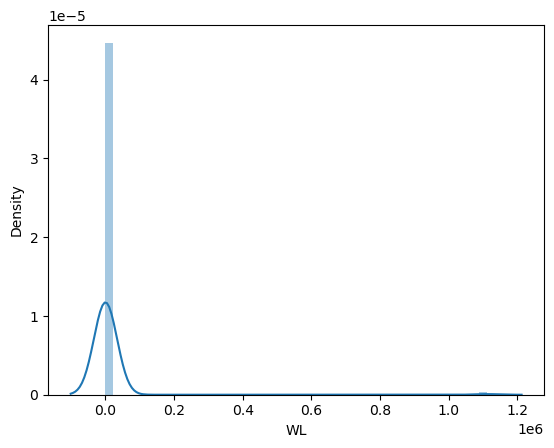

In [33]:
sns.distplot(df_clean['WL'].replace(mean_WL))

## SKlearn Imputer

In [34]:
# Simple Imputer

Features = ['WL',	'Yoga',	'Laps',	'WI',	'PAFS']

from sklearn.impute import SimpleImputer
impt=SimpleImputer(strategy='mean')

# Fit & Transform

si_impt = impt.fit_transform(df_clean[Features])
si_impt_df = pd.DataFrame(si_impt,columns=Features)

si_impt_df

,WL,Yoga,Laps,WI,PAFS
0,23.0,25.000000,30.0,5.0,4.000000
1,24.0,26.000000,31.0,5.0,8.000000
2,24.0,27.000000,31.0,5.0,7.000000
3,26.0,29.000000,34.0,5.0,1.000000
4,27.0,20.823529,34.0,5.0,6.000000
...,...,...,...,...,...
151,12.0,12.000000,13.0,1.0,4.417323
152,12.0,12.000000,14.0,1.0,4.417323
153,12.0,13.000000,14.0,1.0,4.417323
154,13.0,14.000000,15.0,1.0,6.000000


In [35]:
# Iterative Impute

from sklearn.experimental import enable_iterative_imputer

In [36]:
from sklearn.impute import IterativeImputer

ITI = IterativeImputer(max_iter = 10)

# Fit & Transform

ITI_impt = ITI.fit_transform(df_clean[Features])

ITI_impt_df = pd.DataFrame(ITI_impt,columns=Features)

ITI_impt_df

,WL,Yoga,Laps,WI,PAFS
0,23.0,25.000000,30.0,5.0,4.000000
1,24.0,26.000000,31.0,5.0,8.000000
2,24.0,27.000000,31.0,5.0,7.000000
3,26.0,29.000000,34.0,5.0,1.000000
4,27.0,22.559059,34.0,5.0,6.000000
...,...,...,...,...,...
151,12.0,12.000000,13.0,1.0,4.386541
152,12.0,12.000000,14.0,1.0,4.386565
153,12.0,13.000000,14.0,1.0,4.386593
154,13.0,14.000000,15.0,1.0,6.000000


In [37]:
# KNN imputer

from sklearn.impute import KNNImputer

KNN = KNNImputer(n_neighbors = 3)

# Fit & Transform

KNN_impt = KNN.fit_transform(df_clean[Features])

KNN_impt_df = pd.DataFrame(KNN_impt,columns=Features)

KNN_impt_df

,WL,Yoga,Laps,WI,PAFS
0,23.0,25.000000,30.0,5.0,4.000000
1,24.0,26.000000,31.0,5.0,8.000000
2,24.0,27.000000,31.0,5.0,7.000000
3,26.0,29.000000,34.0,5.0,1.000000
4,27.0,22.666667,34.0,5.0,6.000000
...,...,...,...,...,...
151,12.0,12.000000,13.0,1.0,4.666667
152,12.0,12.000000,14.0,1.0,5.333333
153,12.0,13.000000,14.0,1.0,6.000000
154,13.0,14.000000,15.0,1.0,6.000000


In [38]:
# clone the repository
# !git clone https://github.com/analokmaus/kuma_utils.git

In [39]:
import sys
sys.path.append('kuma_utils/')

In [40]:
from kuma_utils.preprocessing.imputer import LGBMImputer

In [41]:
%%time
lgbm_itr=LGBMImputer(n_iter=100,verbose=True)

df_itr=lgbm_itr.fit_transform(df_clean[Features])


df_itr_df=pd.DataFrame(df_itr,columns=Features)

  0%|          | 0/5 [00:00<?, ?it/s]

/home/abhishektiwari/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/home/abhishektiwari/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/home/abhishektiwari/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument

CPU times: user 2.29 s, sys: 390 ms, total: 2.68 s
Wall time: 786 ms


/home/abhishektiwari/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/home/abhishektiwari/anaconda3/lib/python3.11/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


In [42]:
df_itr_df

,WL,Yoga,Laps,WI,PAFS
0,23.0,25.000000,30.0,5.0,4.000000
1,24.0,26.000000,31.0,5.0,8.000000
2,24.0,27.000000,31.0,5.0,7.000000
3,26.0,29.000000,34.0,5.0,1.000000
4,27.0,24.357742,34.0,5.0,6.000000
...,...,...,...,...,...
154,12.0,12.000000,13.0,1.0,3.664669
155,12.0,12.000000,14.0,1.0,3.664669
156,12.0,13.000000,14.0,1.0,4.028572
157,13.0,14.000000,15.0,1.0,6.000000


In [43]:
df_new = df_itr_df

## Univariate Analysis

In [44]:
df_new.columns

Index(['WL', 'Yoga', 'Laps', 'WI', 'PAFS'], dtype='object')

/home/abhishektiwari/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/home/abhishektiwari/anaconda3/lib/python3.11/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Axes: xlabel='WL', ylabel='Density'>

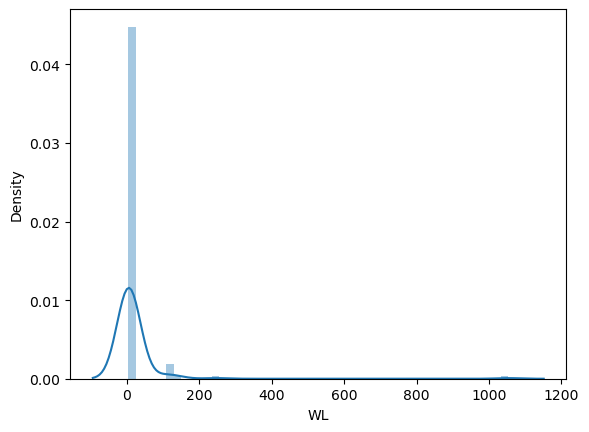

In [45]:
sns.distplot(np.sqrt(df_new['WL']))

/home/abhishektiwari/anaconda3/lib/python3.11/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Axes: xlabel='WL'>

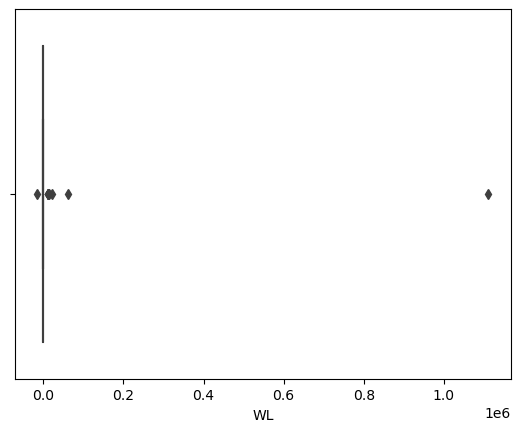

In [46]:
sns.boxplot(df_new['WL'])

/home/abhishektiwari/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: >

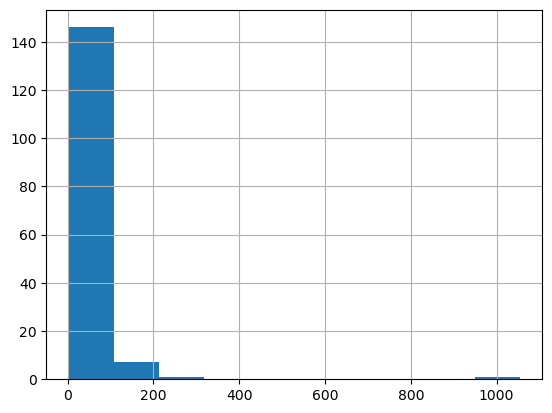

In [47]:
np.sqrt(df_new['WL']).hist()

<Axes: >

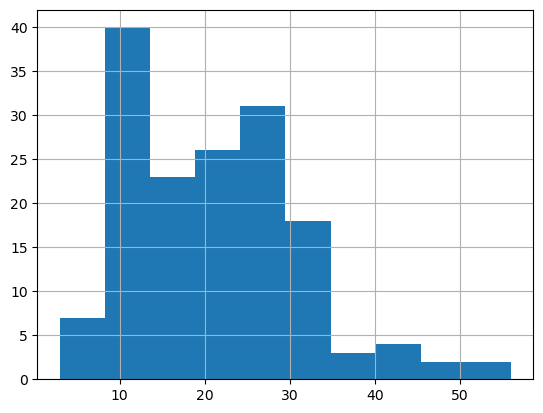

In [48]:
### Yoga

df_new['Yoga'].hist()

/home/abhishektiwari/anaconda3/lib/python3.11/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Axes: xlabel='Yoga', ylabel='Density'>

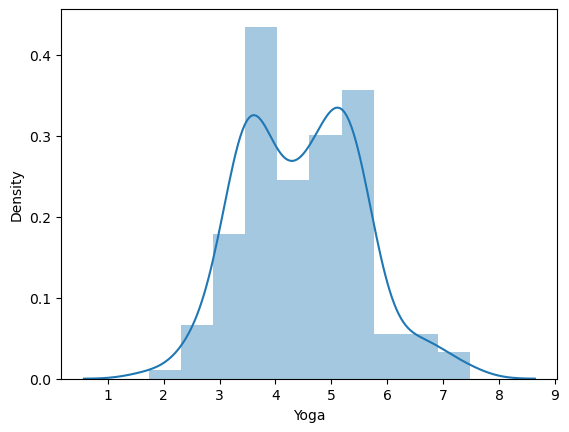

In [49]:
sns.distplot(np.sqrt(df_new['Yoga']))

/home/abhishektiwari/anaconda3/lib/python3.11/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Axes: xlabel='Laps', ylabel='Density'>

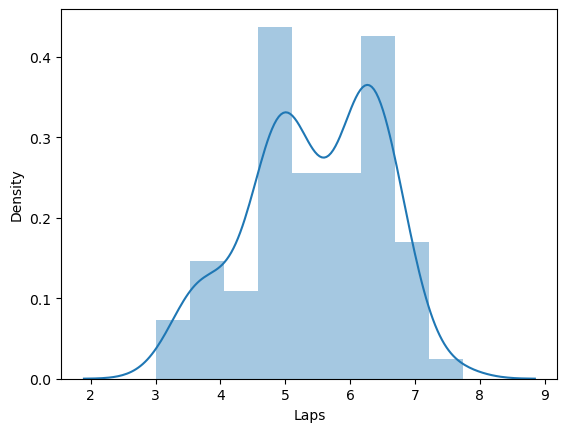

In [50]:
sns.distplot(np.sqrt(df_new['Laps']))

/home/abhishektiwari/anaconda3/lib/python3.11/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Axes: xlabel='WI', ylabel='Density'>

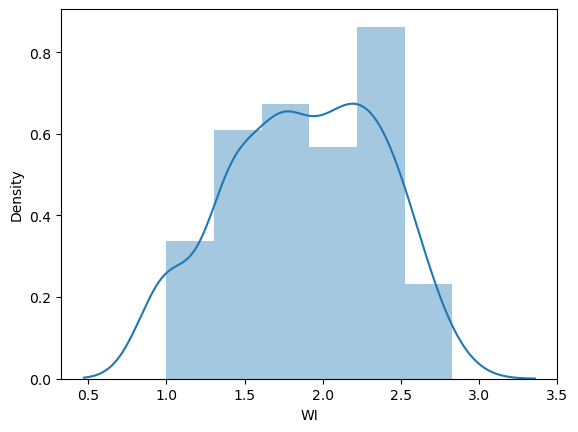

In [51]:
sns.distplot(np.sqrt(df_new['WI']))

/home/abhishektiwari/anaconda3/lib/python3.11/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Axes: xlabel='PAFS', ylabel='Density'>

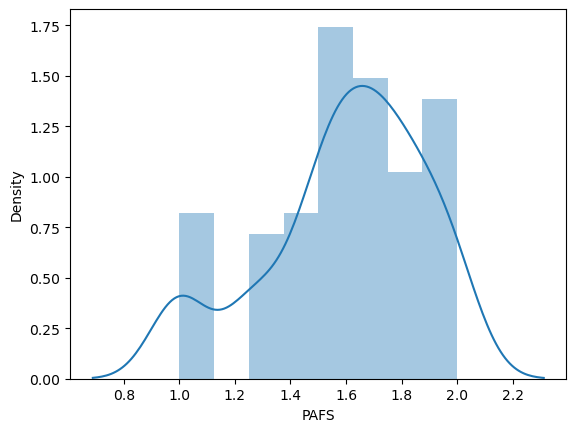

In [52]:
sns.distplot(np.cbrt(df_new['PAFS']))

In [53]:
## Bivariate Analysis

## 1 Linear Correlation --> Pearson correlation

df_clean.shape,df_new.shape

((156, 7), (156, 5))

In [54]:
df_clean.columns

Index(['Team', 'Points', 'WL', 'Yoga', 'Laps', 'WI', 'PAFS'], dtype='object')

In [55]:
df_new.columns

Index(['WL', 'Yoga', 'Laps', 'WI', 'PAFS'], dtype='object')

In [56]:
df_new["Points"] = df_clean["Points"]

In [57]:
df_new["Team"] = df_clean["Team"]

In [58]:
df_new.corr()

/tmp/ipykernel_4093/4139654481.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_new.corr()


,WL,Yoga,Laps,WI,PAFS,Points
WL,1.000000,0.091917,0.040915,0.113882,0.145866,0.059128
Yoga,0.091917,1.000000,0.926390,0.622373,0.042056,0.345231
Laps,0.040915,0.926390,1.000000,0.777224,0.034896,0.478392
WI,0.113882,0.622373,0.777224,1.000000,0.136043,0.423712
PAFS,0.145866,0.042056,0.034896,0.136043,1.000000,0.061129
Points,0.059128,0.345231,0.478392,0.423712,0.061129,1.000000


/tmp/ipykernel_4093/4116783392.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_new.corr(),annot=True)


Text(0.5, 1.0, 'Linear Correlation Matrix')

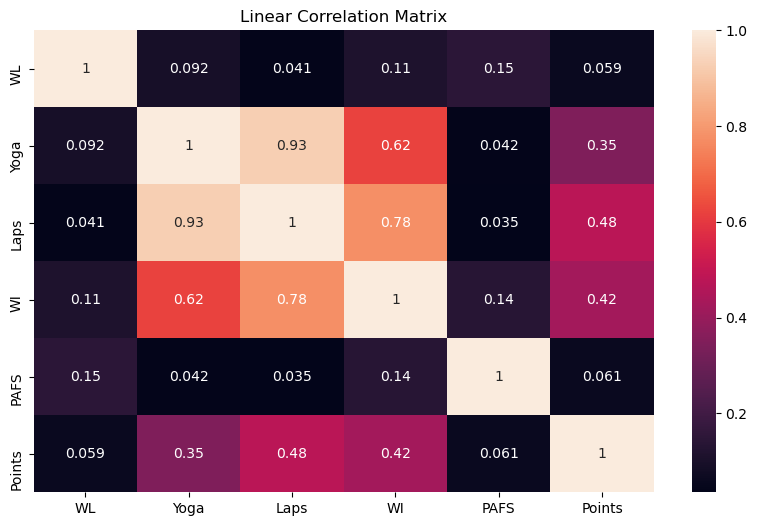

In [59]:
plt.rcParams["figure.figsize"]=(10,6)
sns.heatmap(df_new.corr(),annot=True)

plt.title("Linear Correlation Matrix")

/home/abhishektiwari/anaconda3/lib/python3.11/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


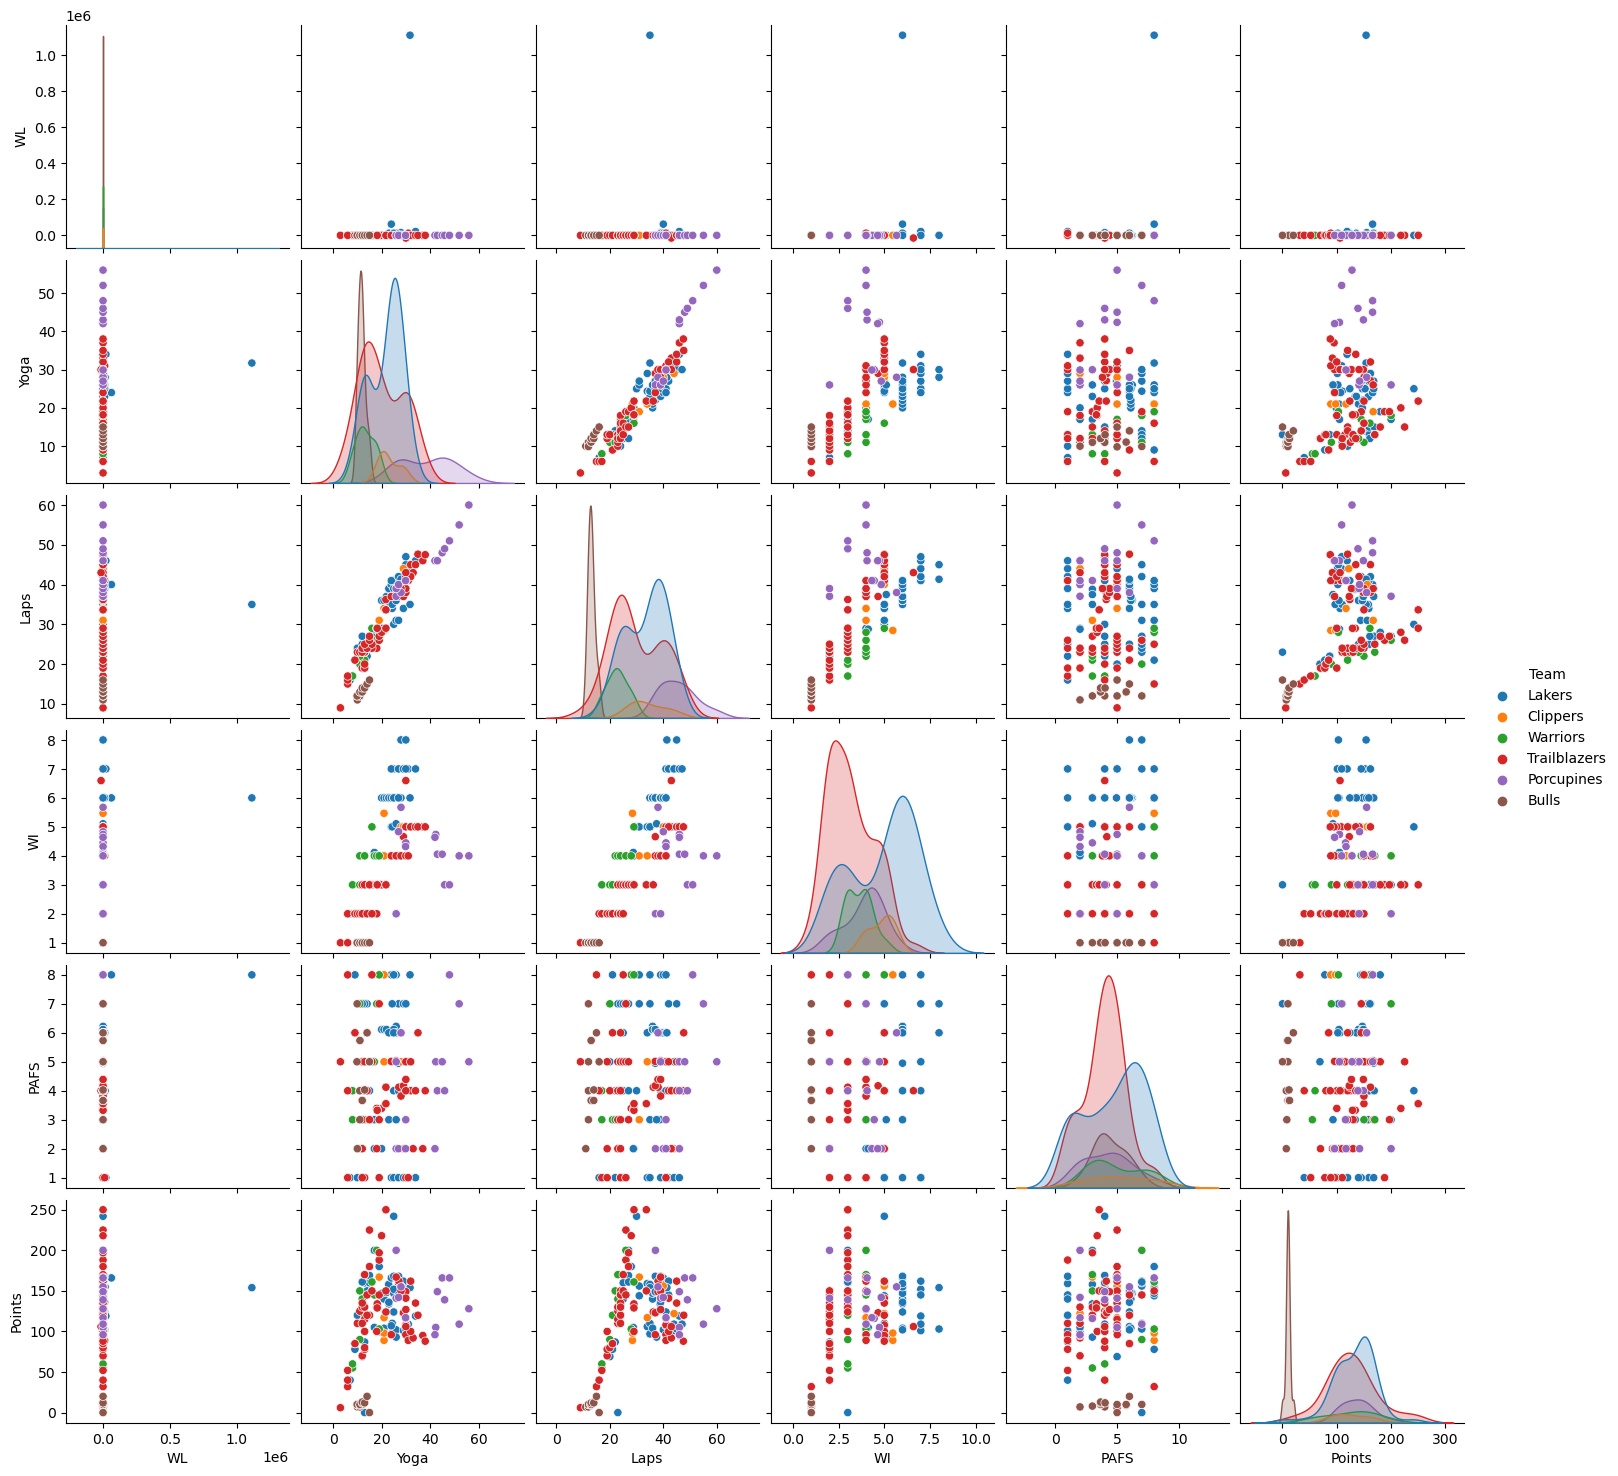

In [60]:
sns.pairplot(df_new,kind='scatter',hue='Team')

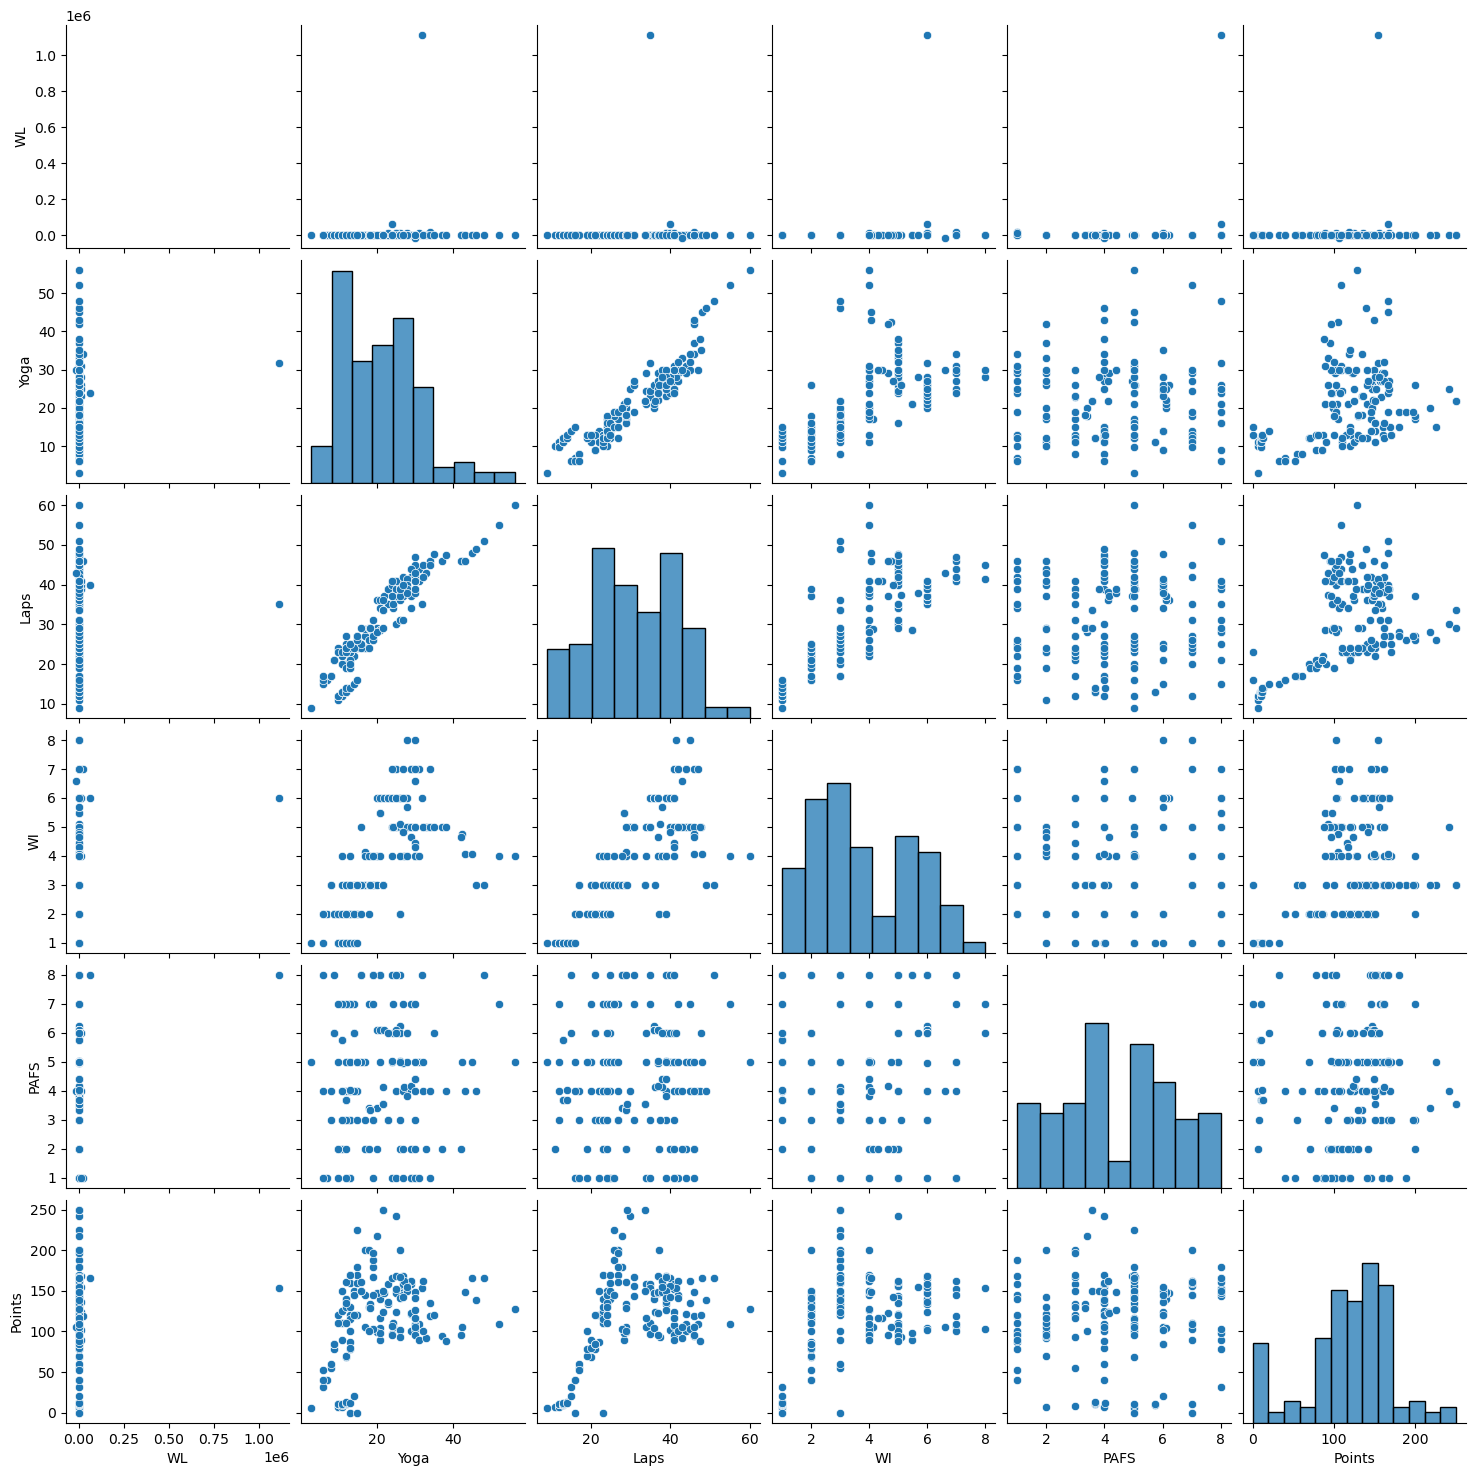

In [61]:
sns.pairplot(df_new,kind='scatter')

In [62]:
def chaterjee_corr(df,x,y):
    N=df.shape[0]
    df_rank=df
    
    df_rank['rank']=df_rank[y].rank()
    #print(df_rank['rank'])
    
    df_rank['rank_x']=df_rank[x].rank()
    
    df_rank=df_rank.sort_values(by='rank_x')
    
    #1-3*(abs(sum(xri-1 - Xir))/n square -1
    
    #Diff function --> summation -> absolute
    
    chatt_corr = 1-3 * df_rank['rank'].diff().abs().sum() / (pow(N,2)-1)
    
    return chatt_corr

In [63]:
chaterjee_corr(df_new,'WL','Points')

0.40357509759605503

In [64]:
chaterjee_corr(df_new,'WI','Points')

0.37780973905896853

In [65]:
chaterjee_corr(df_new,'Laps','Points')

0.41121840969796586

In [66]:
chaterjee_corr(df_new,'PAFS','Points')

0.036449558249434966

In [67]:
chaterjee_corr(df_new,'Yoga','Points')

0.2817752208752825

## Single way Anova